# Implémentation de la régression linéaire avec scikit-learn

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

In [23]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [24]:
boston = pd.DataFrame(data=data,columns=columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
boston['MEDV'] = target

In [26]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

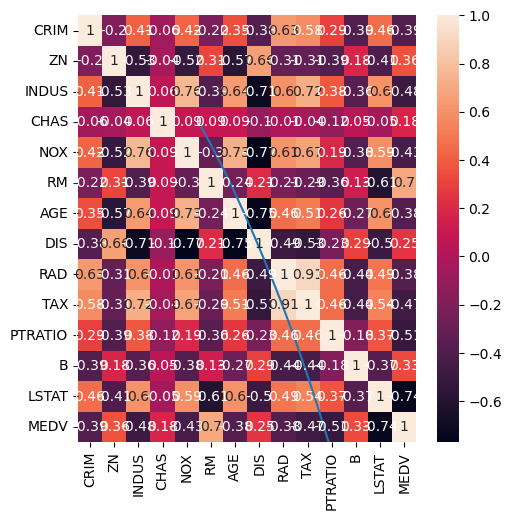

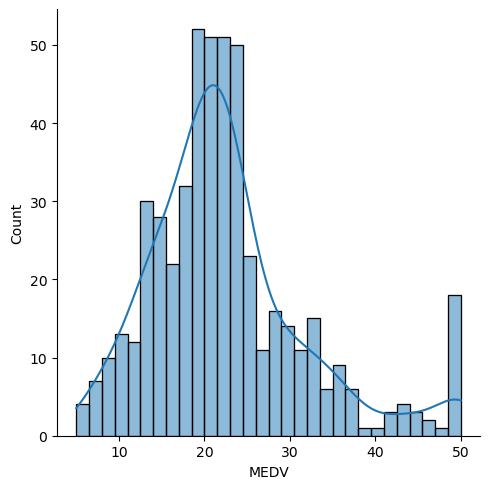

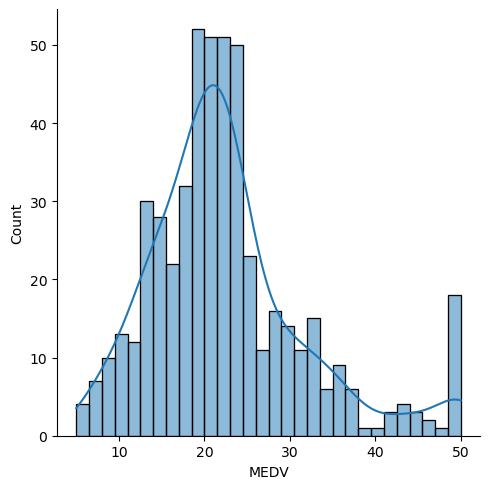

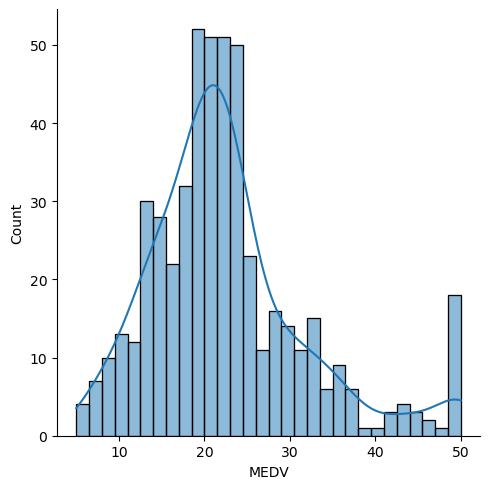

In [51]:
sns.displot(data=boston,x='MEDV', bins=30,kde=True);
plt.show();

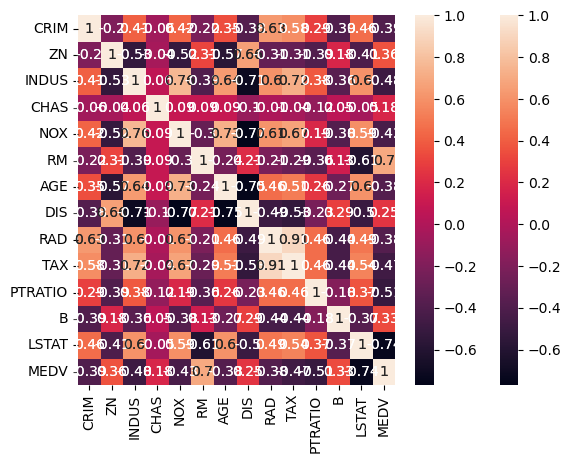

In [53]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True);
plt.show();

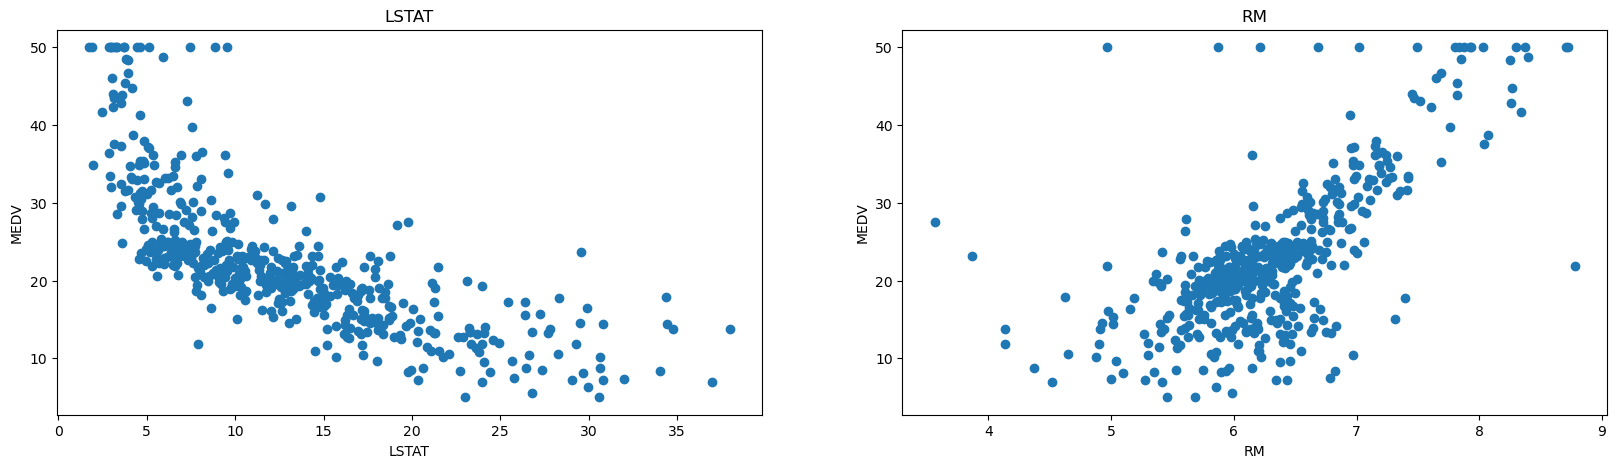

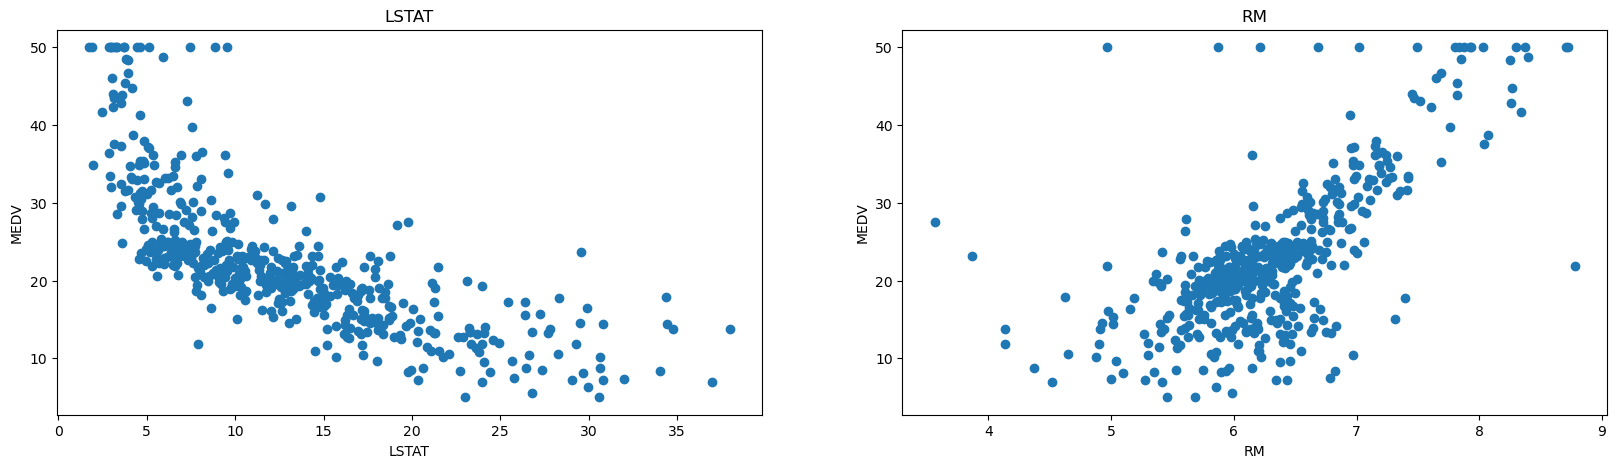

In [57]:
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = boston['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.show();

In [30]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)

StandardScaler()

In [34]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [36]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE esst {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")
# évaluation du modèle pour le set de tesst
y_test_predict = linear_model.predict(X_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# score R carré du modèle
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 score est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE esst 5.295854554553105
le score R2 est 0.6358519563974279


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 6.044926081535136
le score R2 score est 0.6318650681832955


# Implémentation de la régression linéaire from scratch

# Régression polynomiale avec python


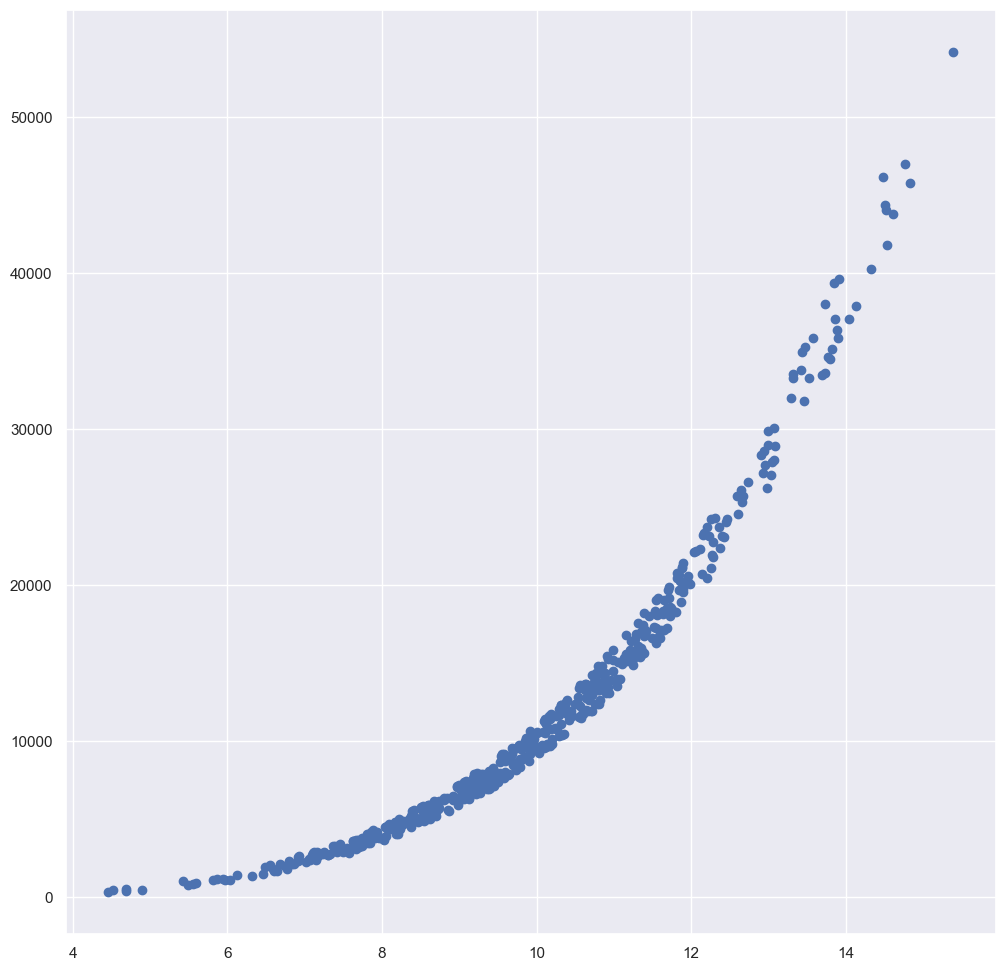

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = [12,12]
 
#plt.figure(figsize=(12,12))
 
 
np.random.seed(0)
#jeu de données sous la forme y = f(x)  avec f(x) = x^4 + bx^3 + c 
 
x = np.random.normal(10, 2, 500)
y = x ** 4 + np.random.uniform(-1, 1,500)*(x ** 3) + np.random.uniform(0, 1,500)
 
plt.scatter(x,y)
plt.show()

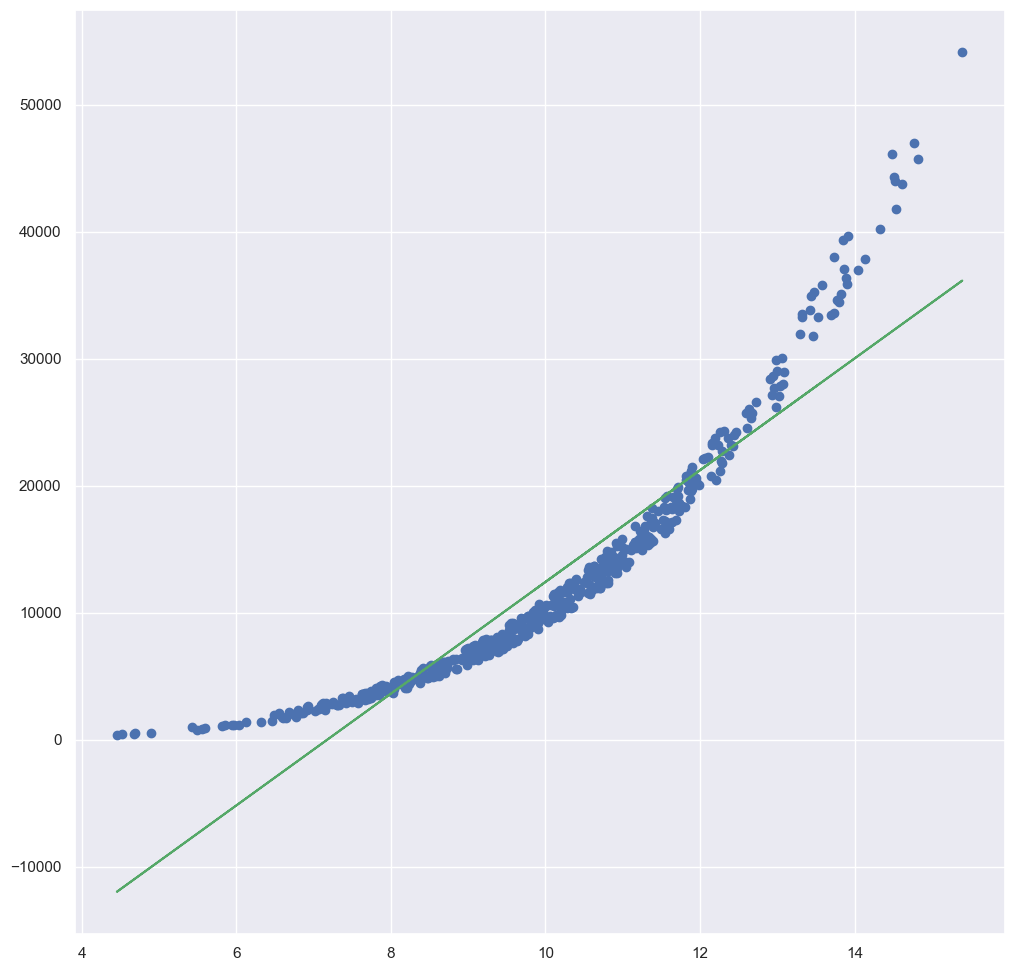

In [59]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
 
model.fit(x,y)
y_predict = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.show()

735.9164925748672


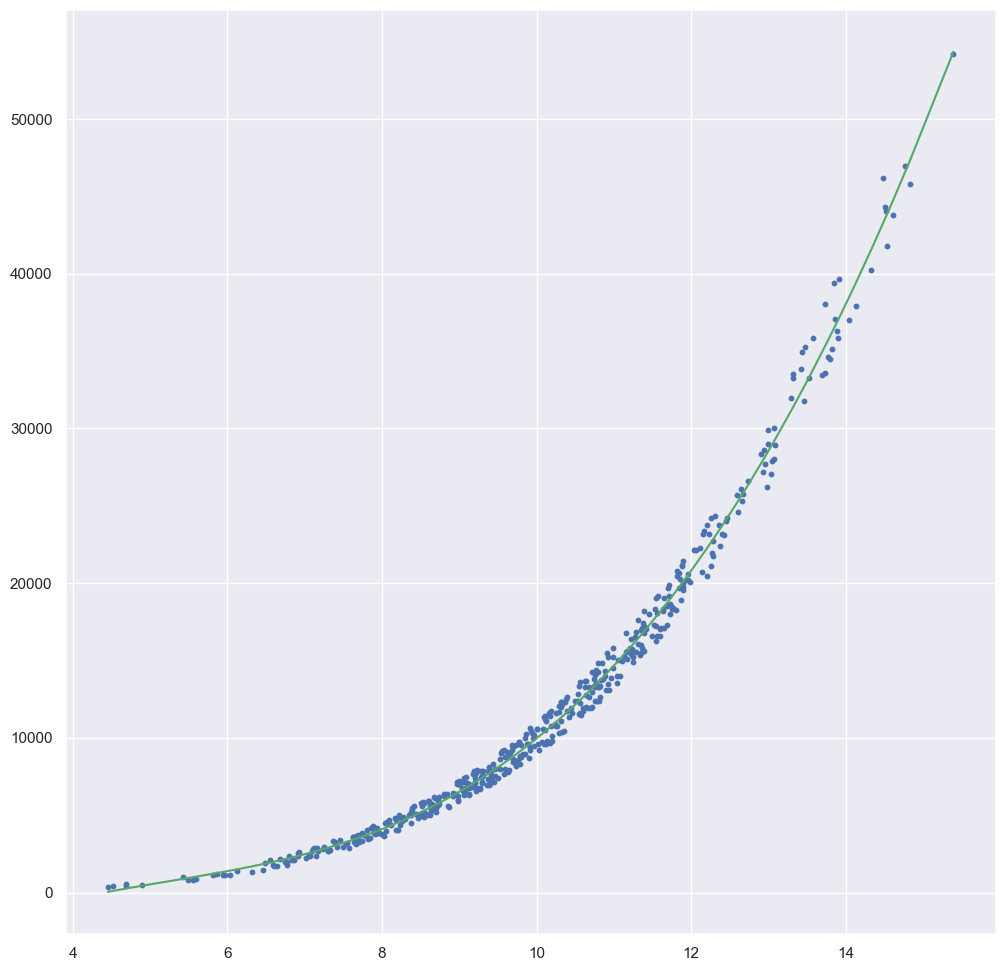

In [60]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)
 
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
 
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
#r2 = r2_score(y,y_poly_pred)
print(rmse)
#print(r2)
import operator
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

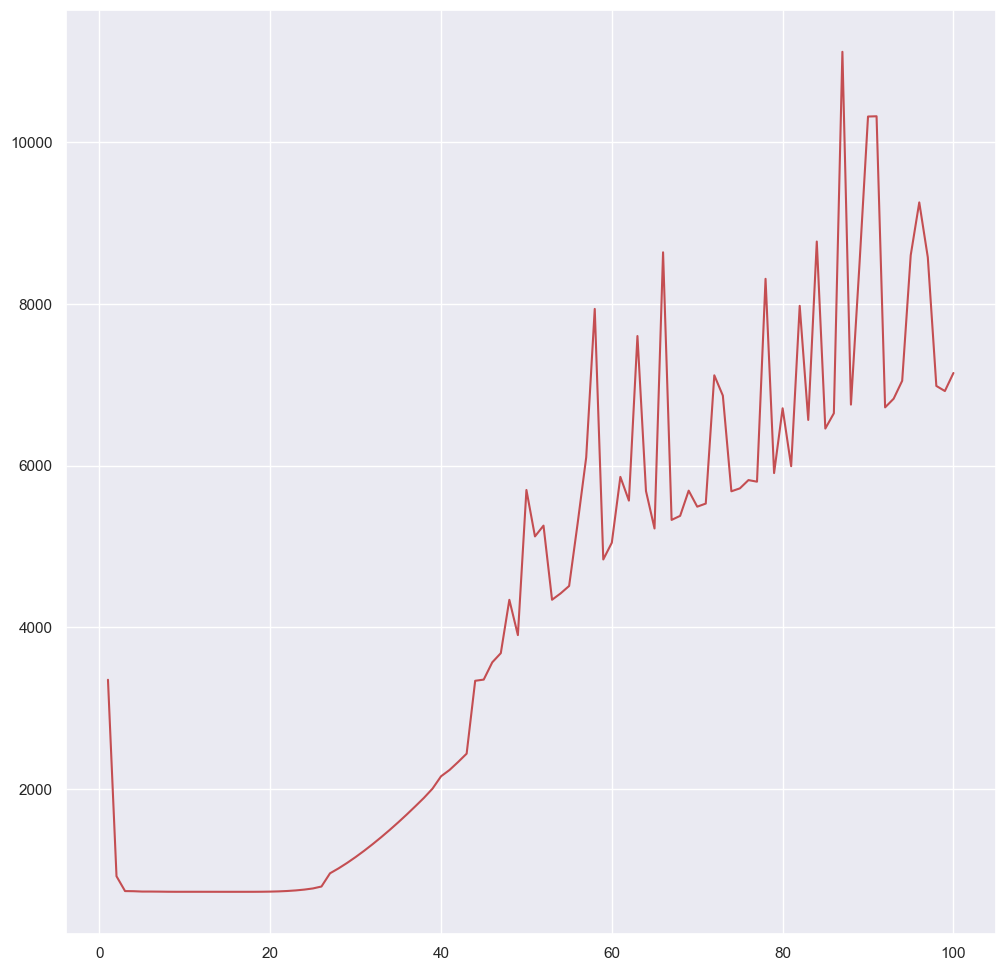

In [61]:
def degreeChoice (x,y,degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    return rmse, x_p, y_poly_pred_P
 
rmselist = np.zeros(100)
x_p_list = [None]*100
y_poly_pred_P_list=[None]*100
for i in np.arange(1, 101):
     
    rmselist[i-1] ,x_p_list[i-1],y_poly_pred_P_list[i-1]= degreeChoice (x,y,i)
     
plt.plot(np.arange(1, 101), rmselist, color='r')
plt.show()

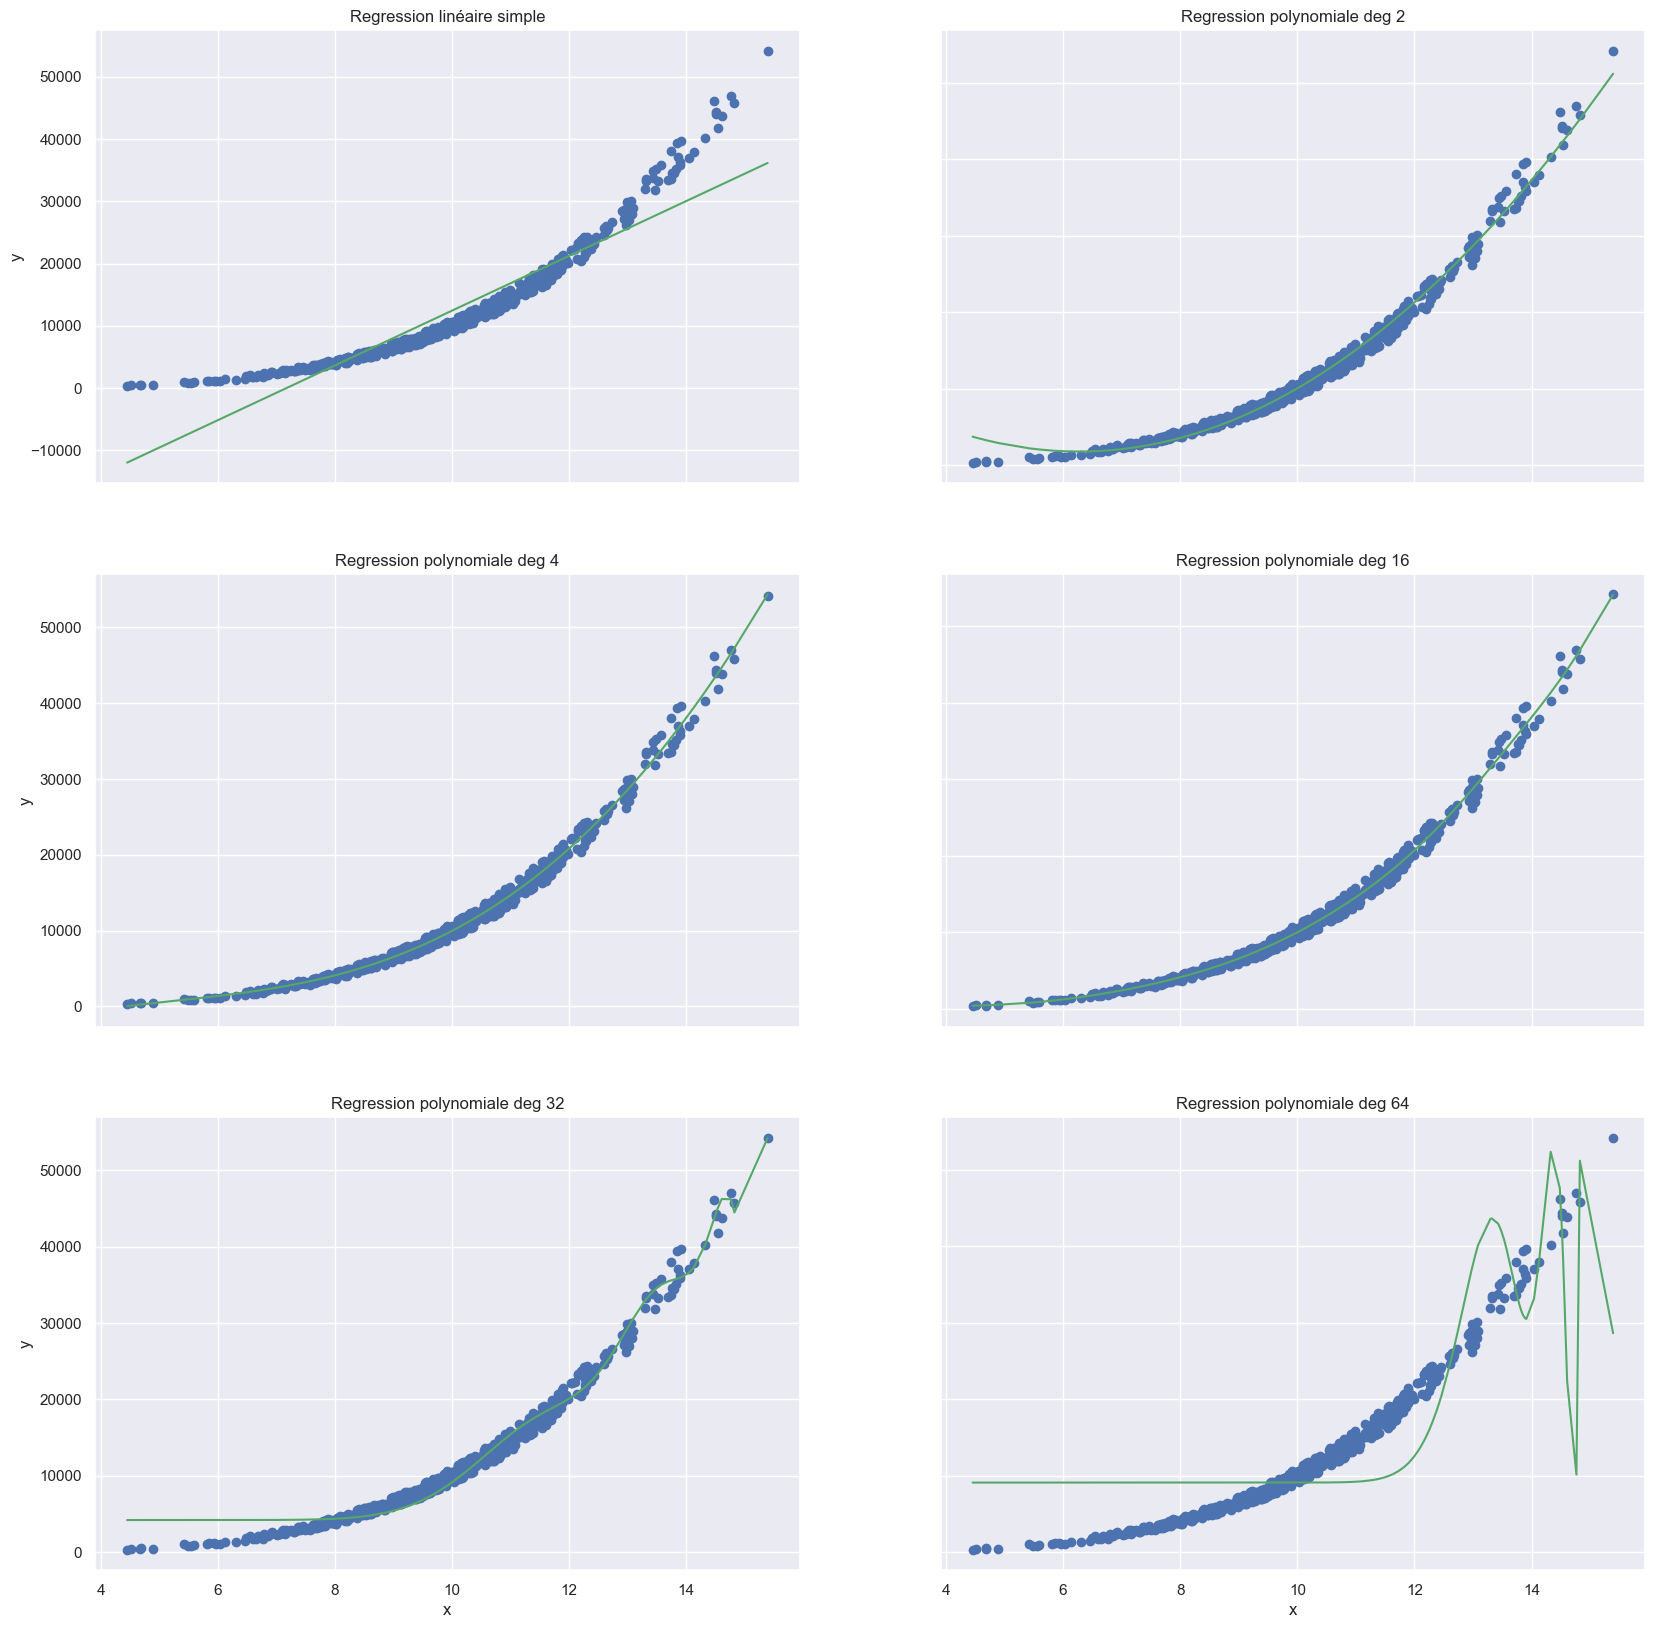

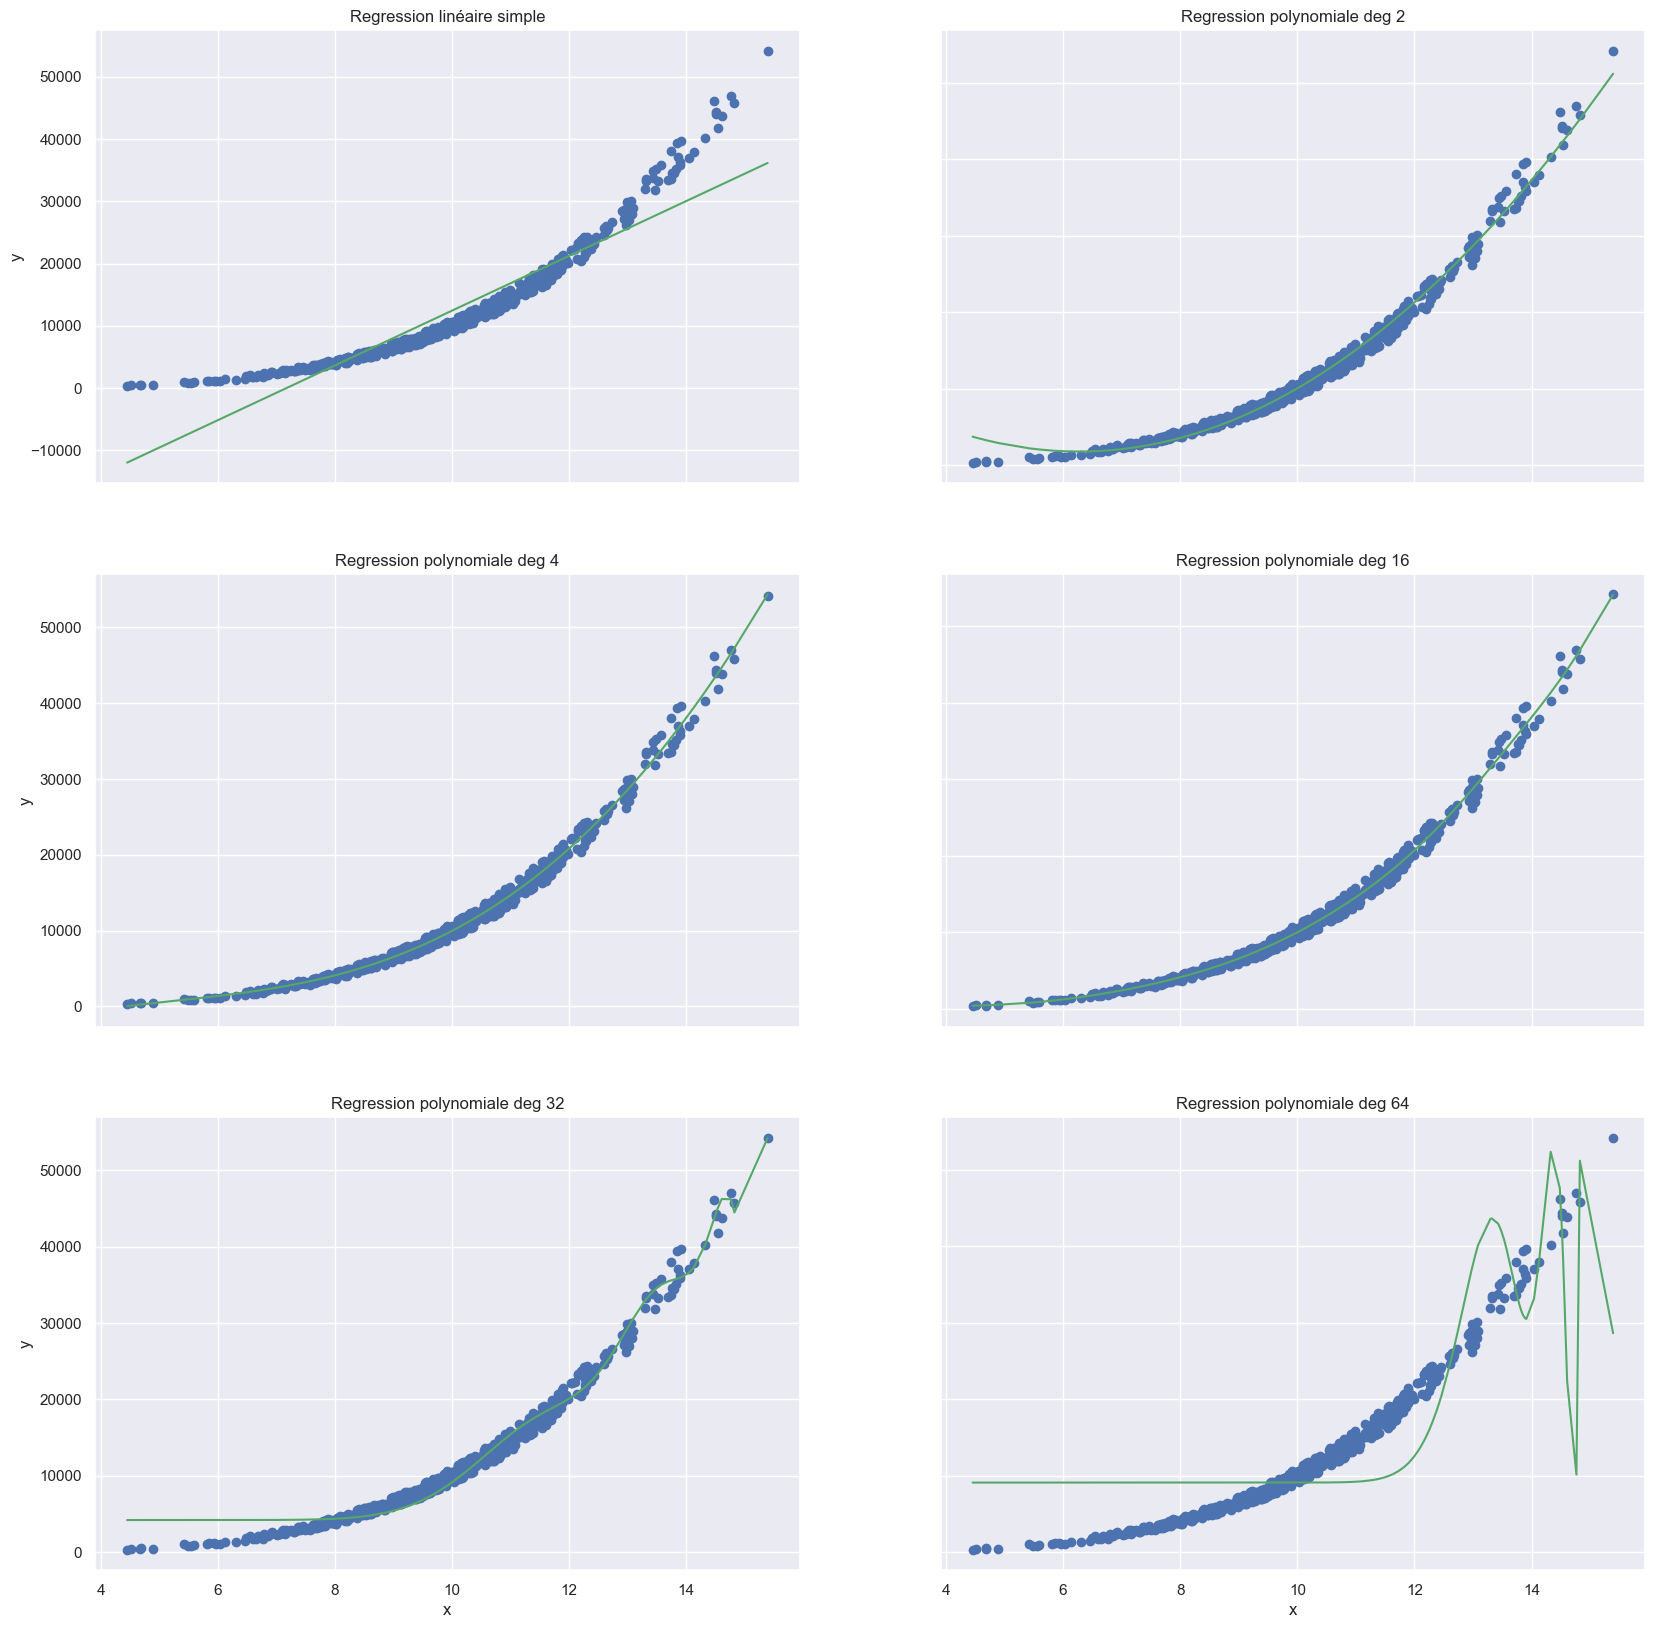

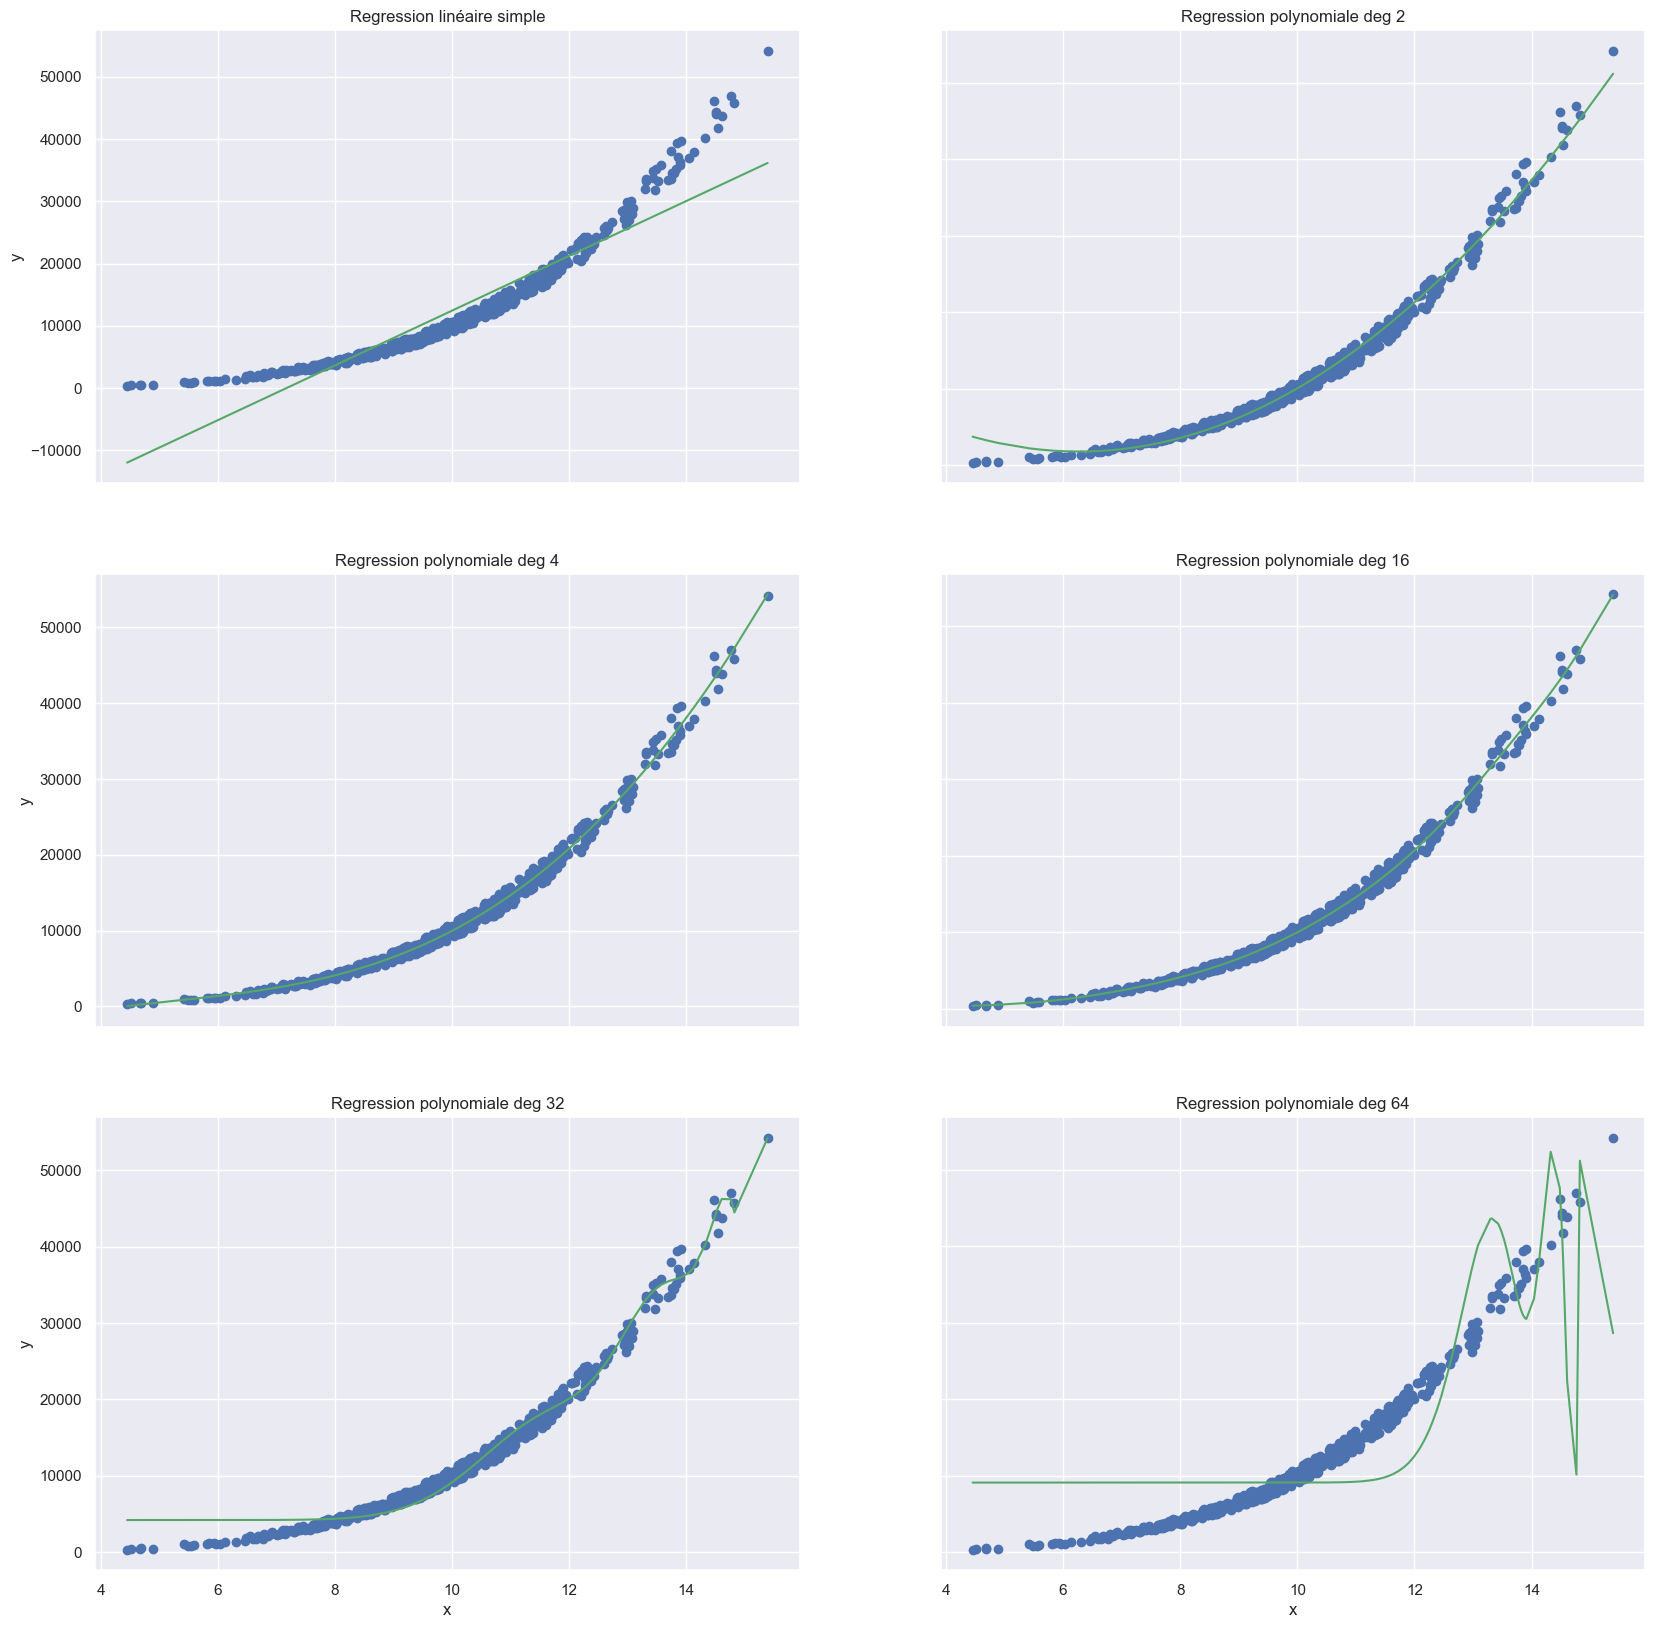

In [65]:
fig, axs = plt.subplots(3, 2,figsize=(20,20))
 
 
axs[0, 0].scatter(x, y)
axs[0, 0].plot(x_p_list[0],y_poly_pred_P_list[0],color='g')
axs[0, 0].set_title('Regression linéaire simple')
 
#degre 2
axs[0, 1].scatter(x, y)
axs[0, 1].plot(x_p_list[1],y_poly_pred_P_list[1],color='g')
axs[0, 1].set_title('Regression polynomiale deg 2')
 
 
#degre 4
axs[1, 0].scatter(x, y)
axs[1, 0].plot(x_p_list[3],y_poly_pred_P_list[3],color='g')
axs[1, 0].set_title('Regression polynomiale deg 4')
 
 
#degre 16
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_p_list[15],y_poly_pred_P_list[15],color='g')
axs[1, 1].set_title('Regression polynomiale deg 16')
 
#degre 32
axs[2, 0].scatter(x, y)
axs[2, 0].plot(x_p_list[31],y_poly_pred_P_list[31],color='g')
axs[2, 0].set_title('Regression polynomiale deg 32')
 
#degre 64
axs[2, 1].scatter(x, y)
axs[2, 1].plot(x_p_list[63],y_poly_pred_P_list[63],color='g')
axs[2, 1].set_title('Regression polynomiale deg 64')
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
 
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [79]:
#on importe les libs et les données 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
donnees_boston = load_boston()
 
#Transformation de notre jeu de données en Data Frame grace à pandas
donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
 
#on utilise seulement 4 variables explicatives
X=pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])

Y = donnees_boston_df['TAX']

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#on defintit la fonction pour entrainer et choisir notre modèle en fonction du degré du polynome
 
def evalPolynonmialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    # Evaluation du training set
 
    y_train_predict = model.predict(X_train_poly)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
 
    print('La performance du modèle sur la base dapprentissage')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation du testing set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
 
    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model,r2 ,rmse

(404, 4)
(102, 4)
(404,)
(102,)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [81]:
evalPolynonmialRegression(4)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 1.1037940221053966e-06
le score R2 est 1.0


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 1.342785866538115e-06
le score R2 est 0.9999999999999999


(LinearRegression(), 0.9999999999999999, 1.342785866538115e-06)

# Régularisation avec SciKit-Learn: Régression Ridge, Lasso et Elastic Net

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("C:/Users/hp/Downloads/Advertising.csv")
X = df.drop('sales',axis=1)
y = df['sales']

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [90]:
poly_features = polynomial_converter.fit_transform(X)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
scaler.fit(X_train)

StandardScaler()

In [96]:
X_train = scaler.transform(X_train)

In [97]:
X_test = scaler.transform(X_test)

In [99]:
from sklearn.linear_model import Ridge

In [100]:
ridge_model = Ridge(alpha=10)

In [101]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [102]:
test_predictions = ridge_model.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [104]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [105]:
MAE

0.5774404204714177

In [106]:
RMSE

0.894638646131968

In [107]:
# Performance sur Training Set
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.5288348183025332

# #Régression Ridge

Assurez-vous de visionner les leçons en vidéo pour une explication complète de la régression de Ridge et du choix d'un alpha.

In [108]:
from sklearn.linear_model import RidgeCV

In [109]:
# Chooisir un scoring : https://scikit-learn.org/stable/modules/model_evaluation.html
# RMSE négatif, donc toutes les metrics suivent la convention "Plus c'est haut, mieux c'est".

# Voir toutes les options : sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [110]:
# Plus vous passez d'options alpha, plus cela prendra du temps.
# Heureusement, notre ensemble de données est encore assez petit.
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [111]:
ridge_cv_model.alpha_

0.1

In [112]:
test_predictions = ridge_cv_model.predict(X_test)

In [113]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [114]:
MAE

0.42737748843313855

In [115]:
RMSE

0.6180719926906028

In [116]:
# Performance sur Training Set
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.3094132105668577

In [117]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# #Régression Lasso

In [118]:
from sklearn.linear_model import LassoCV

In [119]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [120]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [121]:
lasso_cv_model.alpha_

0.4943070909225828

In [122]:
test_predictions = lasso_cv_model.predict(X_test)

In [123]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [124]:
MAE

0.6541723161252854

In [125]:
RMSE

1.130800102276253

In [126]:
# Performance sur Training Set
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.6912807140820695

In [127]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

# ## Elastic Net

Elastic Net combine les pénalités de la régression de Ridge et de la régression du Lasso dans le but d'obtenir le meilleur des deux mondes !

In [128]:
from sklearn.linear_model import ElasticNetCV

In [129]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [130]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [131]:
elastic_model.l1_ratio_

1.0

In [132]:
test_predictions = elastic_model.predict(X_test)

In [133]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [134]:
MAE

0.5663262117569448

In [135]:
RMSE

0.7485546215633724

In [136]:
# Performance sur Training Set
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.4307582990472369

In [137]:
elastic_model.coef_

array([ 3.78993643,  0.89232919,  0.28765395, -1.01843566,  2.15516144,
       -0.3567547 , -0.271502  ,  0.09741081,  0.        , -1.05563151,
        0.2362506 ,  0.07980911,  1.26170778,  0.01464706,  0.00462336,
       -0.39986069,  0.        ,  0.        , -0.05343757])